# Capstone Project: Dari Angka Menjadi Aksi dengan IBM Granite
**Analisis Kesehatan Mental Remaja Menggunakan Pendekatan Metode Campuran**

- **Nama:** Atharik Putra Rajendra
- **Tanggal:** 21 September 2025


### **Tujuan Proyek**
Proyek ini bertujuan untuk menganalisis dataset global mengenai kesehatan mental remaja. Dengan menggunakan pendekatan metode campuran (Mixed-Methods), kita akan menggabungkan analisis kuantitatif (visualisasi data) dengan analisis kualitatif canggih yang dibantu oleh AI generatif (IBM Granite). Tujuannya adalah untuk mengubah data statistik yang abstrak menjadi narasi persona yang humanis, hipotesis akar masalah yang berbasis teori, dan rencana aksi strategis yang dapat ditindaklanjuti.

In [61]:
# --- LANGKAH 1: INSTALASI LIBRARY ---
# Menginstal semua paket Python yang dibutuhkan untuk proyek ini dalam satu baris.
# Opsi '-q' (quiet) digunakan untuk membuat output instalasi lebih ringkas.
print("🚀 [Langkah 1] Menginstal semua library yang dibutuhkan...")
!pip install pandas langchain langchain_community replicate kagglehub matplotlib seaborn -q
print("✅ [Langkah 1] Semua library berhasil diinstal.")

🚀 [Langkah 1] Menginstal semua library yang dibutuhkan...
✅ [Langkah 1] Semua library berhasil diinstal.


### **Persiapan Awal**
Pada tahap ini, kita akan melakukan persiapan teknis sebelum memulai analisis:
1.  **Konfigurasi API Key**: Mengatur kunci API untuk Kaggle (agar bisa mengunduh dataset secara otomatis) dan Replicate (untuk mengakses model IBM Granite). Kunci ini disimpan dengan aman menggunakan fitur Colab Secrets.
2.  **Unduh & Muat Dataset**: Mengunduh dataset "Inside Teen Minds" dari Kaggle dan memuatnya ke dalam DataFrame `pandas`.
3.  **Inisialisasi Model AI**: Menyiapkan koneksi ke model `ibm-granite/granite-3.3-8b-instruct` melalui library LangChain.

In [62]:
# --- LANGKAH 2: KONFIGURASI API KEY ---
import os
from google.colab import userdata

# Konfigurasi Kaggle API
try:
    kaggle_key = userdata.get('kaggle_key')
    # Membuat file kaggle.json di dalam environment Colab
    !mkdir -p ~/.kaggle
    with open('/root/.kaggle/kaggle.json', 'w') as f:
        f.write(kaggle_key)
    !chmod 600 ~/.kaggle/kaggle.json
    print("✅ Kaggle API berhasil dikonfigurasi.")
except Exception as e:
    print("🚨 Gagal mengkonfigurasi Kaggle API. Pastikan secret 'KAGGLE_KEY' sudah benar.")

# Konfigurasi Replicate API
try:
    api_token = userdata.get('api_token')
    os.environ["REPLICATE_API_TOKEN"] = api_token
    print("✅ Replicate API Token berhasil dikonfigurasi.")
except Exception as e:
    print("🚨 Gagal mengkonfigurasi Replicate API. Pastikan secret 'REPLICATE_API_TOKEN' sudah benar.")

✅ Kaggle API berhasil dikonfigurasi.
✅ Replicate API Token berhasil dikonfigurasi.


In [63]:
# --- LANGKAH 3: UNDUH DATASET DARI KAGGLE ---
import kagglehub
import os

print("Mulai mengunduh dataset dari Kaggle...")

# Mengunduh dataset ke environment Colab
path = kagglehub.dataset_download("dakshbhatnagar08/inside-teen-minds-global-mental-health-and-habits")

print(f"✅ Dataset berhasil diunduh ke direktori: '{path}'")
print("\nDaftar file dalam direktori:")
print(os.listdir(path))

Mulai mengunduh dataset dari Kaggle...
Using Colab cache for faster access to the 'inside-teen-minds-global-mental-health-and-habits' dataset.
✅ Dataset berhasil diunduh ke direktori: '/kaggle/input/inside-teen-minds-global-mental-health-and-habits'

Daftar file dalam direktori:
['modern_teen_mental_health_main.csv', 'wellness_habits_distribution.csv', 'ai_tool_popularity.csv', 'ai_usage_by_country.csv', 'average_support_feeling_by_country.csv', 'average_mood_stress_by_gender.csv', 'daily_mood_stress_trends.csv', 'screen_vs_sleep_by_age.csv']


In [64]:
# --- LANGKAH 4: MUAT DATA DAN ANALISIS AWAL ---
import pandas as pd

# Nama file utama dari daftar di atas
main_file_name = 'modern_teen_mental_health_main.csv'

# Membuat path lengkap ke file
full_file_path = os.path.join(path, main_file_name)

# Memuat data ke DataFrame
df = pd.read_csv(full_file_path)

print(f"✅ File '{main_file_name}' berhasil dimuat.")
print("\n--- 5 Baris Data Pertama ---")
display(df.head())

print("\n--- Informasi Kolom dan Tipe Data ---")
df.info()

print("\n--- Statistik Deskriptif untuk Kolom Angka ---")
display(df.describe())

✅ File 'modern_teen_mental_health_main.csv' berhasil dimuat.

--- 5 Baris Data Pertama ---


,student_id,date,age,gender,country,grade,mood,stress_level,sleep_hours,screen_time_hours,used_ai_today,ai_tool,journaled_today,meditated_today,exercised_today,social_interaction_rating,support_feeling
0,S0001,2025-01-01,15,Female,USA,11th,5,5,3.6,2.1,False,NaN,False,False,True,6,7
1,S0001,2025-01-02,15,Female,USA,11th,6,4,9.1,8.8,True,Phind,True,False,True,4,7
2,S0001,2025-01-03,15,Female,USA,11th,8,2,8.5,7.8,True,Notion AI,False,True,False,6,5
3,S0001,2025-01-04,15,Female,USA,11th,5,6,4.9,6.1,False,NaN,True,True,False,5,9
4,S0001,2025-01-05,15,Female,USA,11th,9,1,7.7,7.5,False,NaN,True,True,False,5,9



--- Informasi Kolom dan Tipe Data ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   student_id                 30000 non-null  object 
 1   date                       30000 non-null  object 
 2   age                        30000 non-null  int64  
 3   gender                     30000 non-null  object 
 4   country                    30000 non-null  object 
 5   grade                      30000 non-null  object 
 6   mood                       30000 non-null  int64  
 7   stress_level               30000 non-null  int64  
 8   sleep_hours                30000 non-null  float64
 9   screen_time_hours          30000 non-null  float64
 10  used_ai_today              30000 non-null  bool   
 11  ai_tool                    17991 non-null  object 
 12  journaled_today            30000 non-null  bool   
 13  meditat

,age,mood,stress_level,sleep_hours,screen_time_hours,social_interaction_rating,support_feeling
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000
mean,15.557000,6.000733,4.043867,6.487783,6.980977,6.01370,6.500267
std,1.123741,1.991866,2.069449,1.493795,1.993324,1.99786,1.713271
min,14.000000,3.000000,1.000000,0.200000,-0.800000,3.00000,4.000000
25%,15.000000,4.000000,2.000000,5.500000,5.600000,4.00000,5.000000
50%,16.000000,6.000000,4.000000,6.500000,7.000000,6.00000,6.000000
75%,17.000000,8.000000,6.000000,7.500000,8.300000,8.00000,8.000000
max,17.000000,9.000000,8.000000,12.300000,15.600000,9.00000,9.000000


In [65]:
# --- LANGKAH 5: INISIALISASI MODEL AI (IBM GRANITE) ---
from langchain_community.llms import Replicate

# ID Model IBM Granite yang akan digunakan
model_id = "ibm-granite/granite-3.3-8b-instruct"

# Inisialisasi model dengan parameter yang direkomendasikan
llm = Replicate(
    model=model_id,
    model_kwargs={
        "temperature": 0.7,
        "max_new_tokens": 1024,
        "top_p": 1,
        "repetition_penalty": 1.15
    }
)

print(f"✅ Model AI '{model_id}' telah diinisialisasi dan siap digunakan untuk analisis!")

✅ Model AI 'ibm-granite/granite-3.3-8b-instruct' telah diinisialisasi dan siap digunakan untuk analisis!


### **Tahap Kuantitatif: Eksplorasi dan Visualisasi Data**
Sebelum menggunakan AI, kita perlu memahami data kita terlebih dahulu. Tahap ini berfokus pada pembersihan data dan pembuatan visualisasi untuk menemukan pola dan *insight* awal.
1.  **Pembersihan Data**: Kolom `grade` dibersihkan dari karakter non-numerik (misalnya, "11th" menjadi 11) agar bisa dianalisis secara statistik.
2.  **Visualisasi**: Tiga grafik utama dibuat untuk memetakan hubungan antar variabel dan membandingkan kelompok data.


🚀 [Langkah 5] Membuat visualisasi data untuk mendapatkan insight...
   - Membersihkan kolom 'grade'...
   - Kolom 'grade' berhasil dibersihkan.
   - Membuat Heatmap Korelasi...


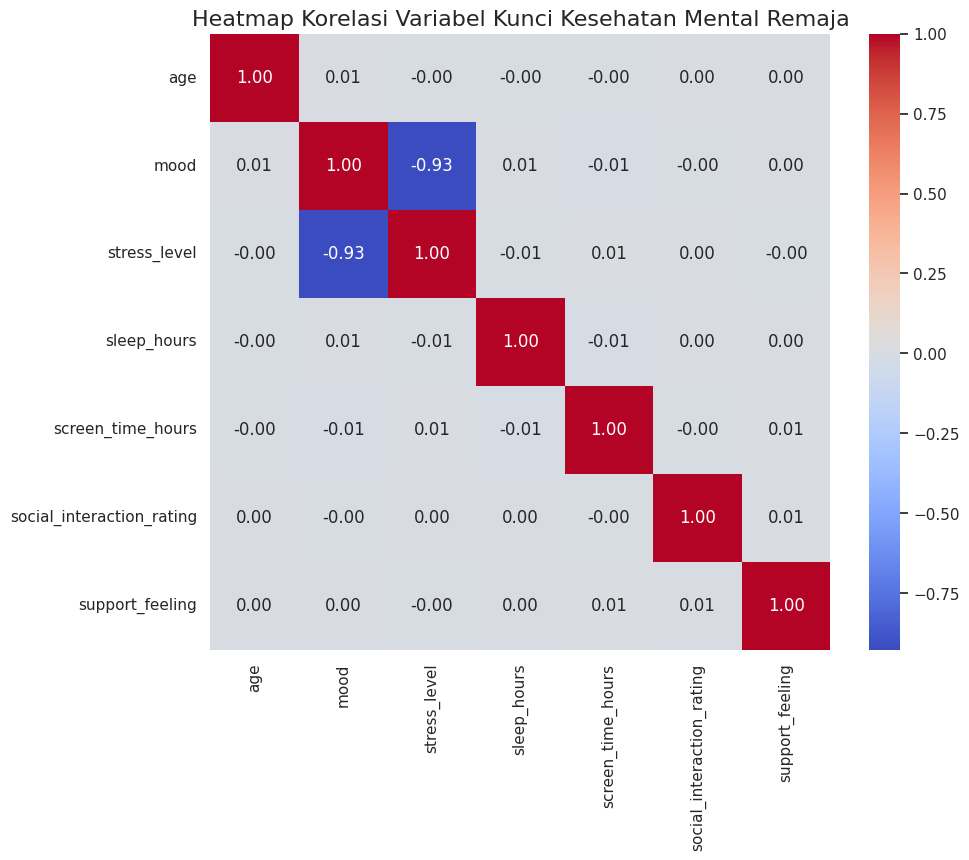

   - Membuat Bar Chart Perbandingan Gender...


/tmp/ipython-input-3435401627.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_gender, x='gender', y='stress_level', palette='viridis')


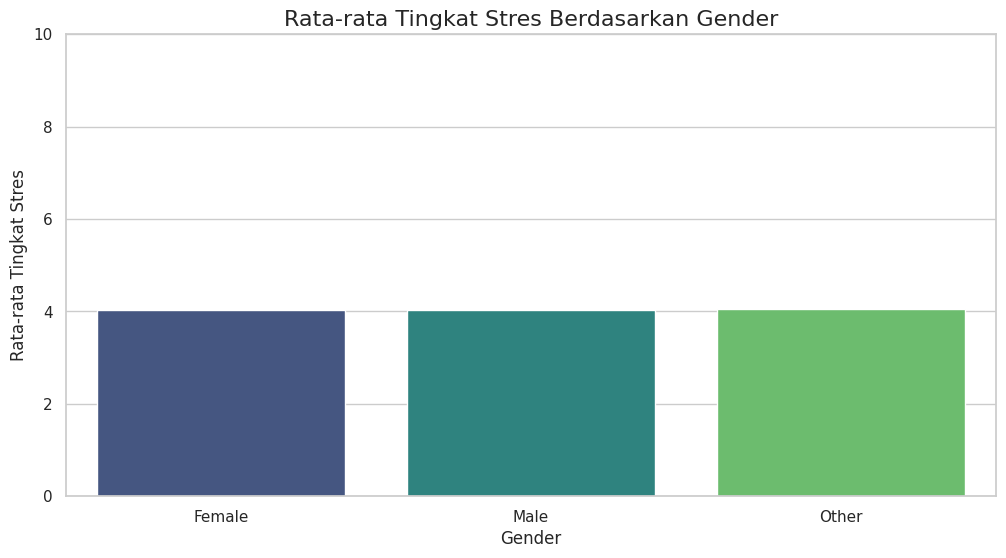

   - Membuat Scatter Plot Hubungan Durasi Layar dan Jam Tidur...


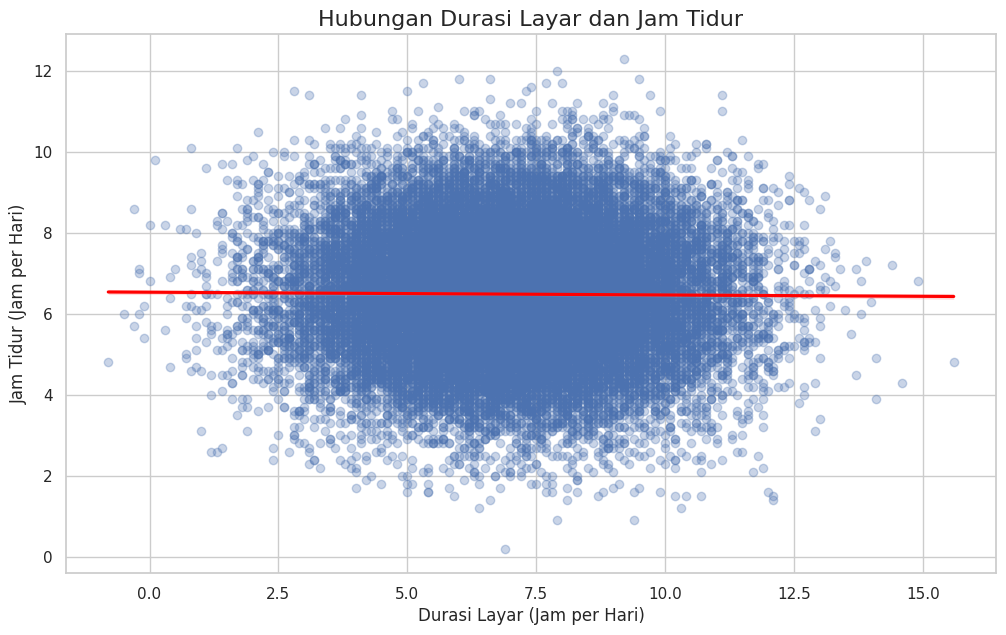

✅ Visualisasi selesai dibuat.


In [66]:
# --- LANGKAH 5: PEMBERSIHAN DATA & ANALISIS VISUAL ---
import matplotlib.pyplot as plt
import seaborn as sns

print("\n🚀 [Langkah 5] Membuat visualisasi data untuk mendapatkan insight...")
sns.set_theme(style="whitegrid")

# --- 5.1 Pembersihan Kolom 'grade' ---
# Membersihkan kolom 'grade' dari karakter non-angka (seperti 'th') dan mengubahnya menjadi tipe numerik.
print("   - Membersihkan kolom 'grade'...")
if 'grade' in df.columns:
    df['grade'] = df['grade'].astype(str).str.replace(r'\D', '', regex=True)
    df['grade'] = pd.to_numeric(df['grade'], errors='coerce')
    df.dropna(subset=['grade'], inplace=True)
    print("   - Kolom 'grade' berhasil dibersihkan.")
else:
    print("   - Kolom 'grade' tidak ditemukan.")

# --- 5.2 Visualisasi 1: Heatmap Korelasi ---
# Heatmap digunakan untuk melihat kekuatan hubungan antar semua variabel numerik secara cepat.
print("   - Membuat Heatmap Korelasi...")
plt.figure(figsize=(10, 8))
# Memilih kolom numerik yang relevan untuk korelasi
numeric_cols_for_corr = ['age', 'mood', 'stress_level', 'sleep_hours', 'screen_time_hours', 'social_interaction_rating', 'support_feeling']
correlation_matrix = df[numeric_cols_for_corr].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Variabel Kunci Kesehatan Mental Remaja', fontsize=16)
plt.show()

# Memuat data agregat untuk visualisasi kedua
try:
    gender_file_path = os.path.join(path, 'average_mood_stress_by_gender.csv')
    df_gender = pd.read_csv(gender_file_path)

# --- 5.3 Visualisasi 2 & 3: Bar Chart dan Scatter Plot ---
# Bar Chart
    print("   - Membuat Bar Chart Perbandingan Gender...")
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df_gender, x='gender', y='stress_level', palette='viridis')
    plt.title('Rata-rata Tingkat Stres Berdasarkan Gender', fontsize=16)
    plt.xlabel('Gender', fontsize=12)
    plt.ylabel('Rata-rata Tingkat Stres', fontsize=12)
    plt.ylim(0, 10)
    plt.show()
except FileNotFoundError:
    print("   - Peringatan: File 'average_mood_stress_by_gender.csv' tidak ditemukan. Visualisasi 2 dilewati.")

# Scatter Plot
print("   - Membuat Scatter Plot Hubungan Durasi Layar dan Jam Tidur...")
plt.figure(figsize=(12, 7))
sns.regplot(data=df, x='screen_time_hours', y='sleep_hours', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Hubungan Durasi Layar dan Jam Tidur', fontsize=16)
plt.xlabel('Durasi Layar (Jam per Hari)')
plt.ylabel('Jam Tidur (Jam per Hari)')
plt.show()

print("✅ Visualisasi selesai dibuat.")

### **Tahap Kualitatif: Analisis Komparatif dengan IBM Granite**
Ini adalah inti dari proyek saya. Berdasarkan temuan dari tahap kuantitatif, saya mengidentifikasi dua profil/arketipe remaja yang menarik untuk dianalisis lebih dalam. Saya kemudian menjalankan analisis AI multi-lapis untuk setiap arketipe, dengan menyuntikkan landasan teori dari jurnal psikologi untuk memastikan analisisnya kredibel secara ilmiah.

**Arketipe yang Dianalisis:**
1.  **"The Supported Striver"**: Remaja dengan tingkat stres tinggi, namun juga merasa sangat didukung oleh lingkungannya.
2.  **"The Socially Drained User"**: Remaja dengan durasi media sosial sangat tinggi dan kualitas interaksi sosial yang rendah.

**Proses Analisis AI (untuk setiap arketipe):**
1.  **7A - Generasi Persona**: Mengubah data statistik menjadi narasi studi kasus.
2.  **7B - Analisis Akar Masalah (dengan "Suntikan Jurnal"):** Mengidentifikasi "mengapa" di balik narasi. Pada tahap krusial ini, AI tidak dibiarkan menganalisis secara bebas. Sebaliknya, ringkasan dari teori psikologi yang relevan (seperti Stress-Buffering Hypothesis dan Displacement Hypothesis) "disuntikkan" langsung ke dalam prompt. Ini memaksa AI untuk mendasarkan analisis akar masalahnya pada landasan ilmiah yang sudah teruji, bukan hanya pengetahuan umumnya.
3.  **7C - Generasi Rencana Aksi**: Mengubah hipotesis akar masalah menjadi solusi strategis yang konkret.

In [67]:
# --- LANGKAH 6: MENEMUKAN PROFIL ARKETIPE KUNCI ---
print("\n🚀 [Langkah 6] Menemukan profil arketipe dari data...")

# Mendefinisikan Arketipe 1 dan memilih profil paling representatif
# Arketipe 1: "The Supported Striver" (Stres tinggi & merasa sangat didukung)
supported_striver_df = df[(df['stress_level'] >= 7) & (df['support_feeling'] >= 7)]
profil_1 = None
if not supported_striver_df.empty:
    profil_1 = supported_striver_df.loc[supported_striver_df['stress_level'].idxmax()]
    print(f"✅ Ditemukan {len(supported_striver_df)} profil 'Supported Striver'. Profil kunci dipilih.")
else:
    print("   - Tidak ditemukan profil 'Supported Striver'.")

# Mendefinisikan Arketipe 1 dan memilih profil paling representatif
# Arketipe 2: "The Socially Drained User" (Durasi medsos tinggi & kualitas interaksi sosial rendah)
socially_drained_df = df[(df['screen_time_hours'] >= 7) & (df['social_interaction_rating'] <= 5)]
profil_2 = None
if not socially_drained_df.empty:
    profil_2 = socially_drained_df.loc[(socially_drained_df['screen_time_hours'] - socially_drained_df['social_interaction_rating']).idxmax()]
    print(f"✅ Ditemukan {len(socially_drained_df)} profil 'Socially Drained User'. Profil kunci dipilih.")
else:
    print("   - Tidak ditemukan profil 'Socially Drained User'.")


🚀 [Langkah 6] Menemukan profil arketipe dari data...
✅ Ditemukan 2061 profil 'Supported Striver'. Profil kunci dipilih.
✅ Ditemukan 6476 profil 'Socially Drained User'. Profil kunci dipilih.


In [68]:
# --- LANGKAH 7: ANALISIS KOMPARATIF DENGAN IBM GRANITE (DENGAN LANDASAN JURNAL) ---

# --- Landasan Teori Psikologi untuk "Disuntikkan" ke dalam Prompt ---
jurnal_striver = """
Menurut hipotesis 'stress-buffering' (Cohen & Wills, 1985), dukungan sosial yang kuat dapat bertindak sebagai 'tameng' yang melindungi individu dari dampak negatif stres. Namun, jika sumber stres bersifat internal (misalnya, perfeksionisme) atau di luar jangkauan dukungan sosial (misalnya, tekanan akademis yang dirasakan secara pribadi), individu tersebut mungkin masih mengalami kecemasan meskipun merasa sangat didukung.
"""
jurnal_socially_drained = """
Penelitian psikologi modern menunjukkan tiga dampak utama dari penggunaan media sosial berlebihan: (1) Hipotesis Perpindahan (Displacement Hypothesis), di mana waktu untuk tidur dan interaksi sosial nyata digantikan oleh waktu di depan layar; (2) Teori Perbandingan Sosial (Social Comparison Theory), yang mengaitkan paparan konstan terhadap kehidupan ideal orang lain dengan penurunan self-esteem dan kecemasan; dan (3) Dampak Cahaya Biru dari layar yang terbukti menekan produksi hormon tidur melatonin.
"""

# Pastikan daftar_profil, profil_1, dan profil_2 sudah ada dari Langkah 6
daftar_profil = {
    "Supported Striver": profil_1,
    "Socially Drained User": profil_2
}
hasil_analisis = {}

for nama_arketipe, profil in daftar_profil.items():
    if profil is not None:
        print(f"\n\n==============================================================================")
        print(f"🚀 MEMULAI ANALISIS UNTUK ARKETIPE: {nama_arketipe}")
        print(f"==============================================================================")
        display(profil)

        hasil_analisis[nama_arketipe] = {}

        # Memilih landasan teori yang sesuai untuk arketipe saat ini
        kutipan_jurnal_terpilih = jurnal_striver if nama_arketipe == "Supported Striver" else jurnal_socially_drained

        # --- 7A: Generasi Persona ---
        print(f"\n🧠 7A: Generasi Persona untuk '{nama_arketipe}'...")
        prompt_persona = f"""
        Tugas: Analisis Profil Data berikut dan isi Template Jawaban di bawah ini. Jawab HANYA dalam Bahasa Indonesia.

        Profil Data: {profil.to_dict()}

        Template Jawaban:
        **1. Ringkasan Naratif:**
        [Tulis narasi singkat (100-150 kata) tentang kehidupan sehari-hari remaja ini.]

        **2. Analisis Konflik Internal (jangan sampai terpotong karena max_new_tokens hanya 1000):**
        - [Jelaskan potensi konflik internal pertama berdasarkan data dan jurnal.]
        - [Jelaskan potensi konflik internal kedua berdasarkan data dan jurnal.]
        """
        llm.model_kwargs['temperature'] = 0.5
        llm.model_kwargs['max_new_tokens'] = 3048

        response_persona = llm.invoke(prompt_persona)
        hasil_analisis[nama_arketipe]['persona'] = response_persona
        print(response_persona)

        # --- 7B: Analisis Akar Masalah ---
        print(f"\n🤔 7B: Analisis Akar Masalah untuk '{nama_arketipe}'...")
        prompt_akar_masalah = f"""
        Tugas: Berdasarkan narasi persona berikut, identifikasi 3 akar masalah utamanya. Jawab HANYA dalam Bahasa Indonesia.

        Landasan Teori dari Jurnal:
        {kutipan_jurnal_terpilih}

        Naratif Persona: "{response_persona}"

        Template Jawaban:
        **Analisis Akar Masalah:**
        1. **Akar Masalah:** [Penjelasan akar masalah 1]
        2. **Akar Masalah:** [Penjelasan akar masalah 2]
        3. **Akar Masalah:** [Penjelasan akar masalah 3]
        """
        llm.model_kwargs['temperature'] = 0.2
        llm.model_kwargs['max_new_tokens'] = 2048

        response_akar_masalah = llm.invoke(prompt_akar_masalah)
        hasil_analisis[nama_arketipe]['akar_masalah'] = response_akar_masalah
        print(response_akar_masalah)

        # --- 7C: Generasi Rencana Aksi ---
        print(f"\n💡 7C: Generasi Rencana Aksi untuk '{nama_arketipe}'...")
        base_prompt_rencana = f"""
        Tugas: Berdasarkan akar masalah berikut, buat 2 rekomendasi program konkret untuk target audiens yang spesifik. Jawab HANYA dalam Bahasa Indonesia.
        Analisis Akar Masalah: "{response_akar_masalah}"
        """

        # 7C.1: Rencana Aksi untuk SISWA
        prompt_siswa = base_prompt_rencana + """
        Target Audiens: Siswa
        Template Jawaban:
        ### Target: Siswa
        1. **Nama Program:** [Nama program]
           - **Deskripsi:** [Deskripsi]
        2. **Nama Program:** [Nama program]
           - **Deskripsi:** [Deskripsi]
        """
        response_siswa = llm.invoke(prompt_siswa)
        print(response_siswa)

        # 7C.2: Rencana Aksi untuk GURU
        prompt_guru = base_prompt_rencana + """
        Target Audiens: Guru
        Template Jawaban:
        ### Target: Guru
        1. **Nama Program:** [Nama program]
           - **Deskripsi:** [Deskripsi]
        2. **Nama Program:** [Nama program]
           - **Deskripsi:** [Deskripsi]
        """
        response_guru = llm.invoke(prompt_guru)
        print(response_guru)

        # 7C.3: Rencana Aksi untuk ORANG TUA
        prompt_orangtua = base_prompt_rencana + """
        Target Audiens: Orang Tua
        Template Jawaban:
        ### Target: Orang Tua
        1. **Nama Program:** [Nama program]
           - **Deskripsi:** [Deskripsi]
        2. **Nama Program:** [Nama program]
           - **Deskripsi:** [Deskripsi]
        """
        response_orangtua = llm.invoke(prompt_orangtua)
        print(response_orangtua)

        # Menggabungkan semua rencana aksi
        response_rencana_aksi = f"{response_siswa}\n\n{response_guru}\n\n{response_orangtua}"
        hasil_analisis[nama_arketipe]['rencana_aksi'] = response_rencana_aksi

    else:
        print(f"\n🚨 Analisis untuk arketipe '{nama_arketipe}' dilewati karena tidak ada profil yang ditemukan.")

print("\n\n✅ SELURUH ALUR KERJA ANALISIS KOMPARATIF TELAH SELESAI.")



🚀 MEMULAI ANALISIS UNTUK ARKETIPE: Supported Striver


,40
student_id,S0002
date,2025-01-11
age,17
gender,Other
country,Canada
grade,11
mood,3
stress_level,8
sleep_hours,6.1
screen_time_hours,3.8



🧠 7A: Generasi Persona untuk 'Supported Striver'...
**1. Ringkasan Naratif:**

Remaja dengan ID S0002, berumur 17 tahun, residen di Kanada, sedang dalam kelas 11 (sekolah seni atas), memiliki level kecemasan yang tinggi (8 dari skala 1-10) dan waktu tidur yang cukup sekitar 6,1 jam. Mereka memiliki gender non-binary atau 'lainnya'. Mereka tidak menggunakan AI hari ini dan tidak menulis jurnal. Tapi, mereka telah melakukan meditasi dan olahraga hari ini, dengan rating interaksi sosial sebesar 6 dan merasa diperhatikan dengan skala 9. Waktu penggunaan media digital atau layar sekitar 3,8 jam.

**2. Analisis Konflik Internal:**

- **Potensi Konflik Internal Pertama: Stres dan Waktu Tidur**

  Data menunjukkan bahwa remaja ini memiliki level kecemasan yang tinggi (8/10) tetapi waktu tidurnya kurang dari rekomendasi (6,1 jam, sedangkan rekomendasi untuk remaja di usia 15-17 tahun adalah 8-10 jam). Konflik internal ini bisa terdapat karena mereka merasa kesulitan untuk mengelola stres merek

,27401
student_id,S0914
date,2025-01-12
age,14
gender,Male
country,Japan
grade,9
mood,4
stress_level,7
sleep_hours,4.8
screen_time_hours,15.6



🧠 7A: Generasi Persona untuk 'Socially Drained User'...
**1. Ringkasan Naratif:**

Remaja dengan ID S0914, bernama laki-laki, berusia 14 tahun, tinggal di Jepang, dalam kelas kecil 9, memiliki level kecemasan yang tinggi (7) dan level tidur yang kurang (4.8 jam). Pada hari terkait, level kegembiraan mencapai 4 dan level interaksi sosial juga cukup (4). Namun, waktu pemakaian layar lebih banyak (15.6 jam) dan tidak menggunakan AI atau melakukan pembalikan jurnal. Remaja ini mempunyai praktik meditasi harian (yay!), tetapi tidak melakukan olahraga atau aktivitas fisik lainnya.

**2. Analisis Konflik Internal:**

- **Konflik Internal Pertama: Tingkat Stres dan Tidur Kurang**
  - Data menunjukkan tingkat kecemasan yang tinggi (7) dan waktu tidur yang relatif kurang (4.8 jam). Konflik internal yang potensial muncul karena keterbatasan waktu tidur yang tidak memenuhi permintaan tubuh remaja, yang kemungkinan besar menyebabkan rasa stres yang meningkat. Hal ini dapat menyebabkan rasa keberat